In [1]:
! conda install --quiet -c conda-forge --yes gensim

Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs: 
    - gensim


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    s3transfer-0.1.13          |           py36_0          76 KB  conda-forge
    certifi-2018.8.13          |           py36_0         138 KB  conda-forge
    gensim-3.5.0               |           py36_0        23.0 MB  conda-forge
    bz2file-0.98               |           py36_1          13 KB  defaults
    openssl-1.0.2o             |       h470a237_1         3.5 MB  conda-forge
    docutils-0.14              |           py36_0         688 KB  conda-forge
    boto-2.49.0                |           py36_0         1.5 MB  defaults
    jmespath-0.9.3             |             py_1          19 KB  conda-forge
    smart_open-1.6.0           |             py_1          35 KB  conda-forge
    boto3-1.7.77      

In [319]:
import pandas as pd
from datetime import datetime, timezone

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 9]

In [320]:
d = lambda t: datetime.date(pd.Timestamp(t))

def get_bigquery_ts(filename):
    df = pd.read_csv(filename, parse_dates=[0], date_parser=d, index_col=0)
    df = df[(df.index > pd.Timestamp(2010,1,1)) & (df.index < pd.Timestamp(2017,7,1))]
    return df

# Growth of AI Software Activity 

In January 2010, there were 50 active open-source A.I. projects that gathered 1,350 commits from 81 different contributors, making up 0.26% of total commits on Github that month. 

In June 2017, A.I. software activity had increased to 26,275 commits to 1,533 projects from 2,480 contributors, making up 0.74% of total commits on Github. 

As can be seen in figure ???, most of this growth has taken place since 2014. In the following 3 years, A.I. open-source software grew about 3 times as much as the rest of open-source software. 

In [ ]:
ai.cnt[0], ai.cnt[-1]

In [ ]:
(ai/gh).cnt[30], (ai/gh).cnt[-1]

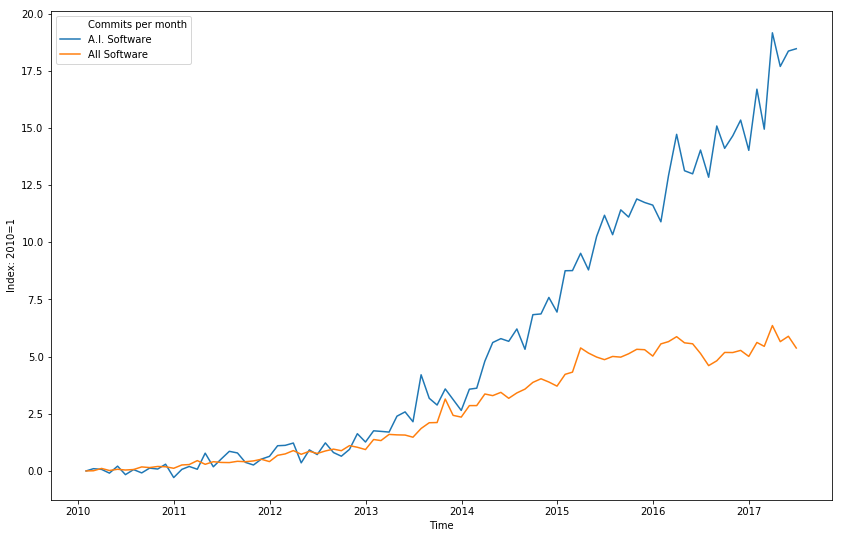

In [321]:
import seaborn as sns

def rebase(df):
    base = df.cnt[0]
    return df.assign(growth = (df.cnt - base)/base)

ai = get_bigquery_ts('commits_timeseries_ai.csv')
gh = get_bigquery_ts('commits_timeseries_gh.csv')

label = 'Commits per month'

df = pd.concat([rebase(ai).assign(**{label: 'A.I. Software'}), 
                rebase(gh).assign(**{label: 'All Software'})])

ax = sns.lineplot(y = df.growth, x = df.index, hue = df[label])
ax.set(ylabel='Index: 2010=1', xlabel='Time')
plt.show()

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


gensim.corpora.textcorpus.TextCorpus